# ANLAYSIS AND PREPROCESING

In [2]:
# Data manipulation 
import os
import pandas as pd
import glob
import numpy as np
from pathlib import Path
from tqdm import tqdm
from scipy.stats import kstest

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

#### merge all files

In [4]:
# Path to the directory containing CSV files
path = Path('C:/Users/Ena/Desktop/THESIS/archive/EyeT/EyeT')

# Get a list of all CSV files in the directory
all_files = [file for file in path.glob('*.csv')]

# Initialize an empty list to store DataFrames
df_list = [] 

# Loop through each CSV file, read it into a DataFrame, and append to df_list
for file_path in tqdm(all_files, desc='Reading CSV files'):
    df = pd.read_csv(file_path, low_memory=False)
    df_list.append(df)

# Concatenate all DataFrames in df_list into a single DataFrame
cleaned_df = pd.concat(df_list)

# Display the shape of the merged DataFrame
print("Shape of the merged DataFrame:", cleaned_df.shape)
#save file
cleaned_df.to_csv('merged_dataset.csv', index=False)
print("Saved")

Reading CSV files: 100%|██████████| 502/502 [00:50<00:00,  9.94it/s]


Shape of the merged DataFrame: (4844304, 71)
Saved


#### Load file

In [6]:
df1 =pd.read_csv("C:/Users/Ena/Desktop/THESIS/merged_dataset.csv", low_memory= False)

#### basic analysis

In [8]:
# Print the first 2 rows of the DataFrame
print("First 2 rows:")
print(df1.head(2))
print()

# Print a white line
print("-" * 40)
print()

# Print the shape of the DataFrame
print("Shape:")
print(df1.shape)
print()

# Print a white line
print("-" * 40)
print()

# Print info about the DataFrame
print("Info:")
print(df1.info())
print()

# Print a white line
print("-" * 40)
print()

# Print summary statistics of the DataFrame
print("Summary Statistics:")
print(df1.describe())
print()

# Print a white line
print("-" * 40)
print()

# Print the number of missing values in each column
print("Number of Missing Values:")
print(df1.isnull().sum())


First 2 rows:
   Unnamed: 0  Recording timestamp  Computer timestamp Sensor  \
0        3082             23419315           512092386    NaN   
1        3083             23419315           512092386    NaN   

            Project name Export date Participant name Recording name  \
0  Test group experiment  29.10.2020  Participant0001     Recording1   
1  Test group experiment  29.10.2020  Participant0001     Recording1   

  Recording date Recording date UTC Recording start time  \
0     24.09.2020         24.09.2020         15:17:34.920   
1     24.09.2020         24.09.2020         15:17:34.920   

  Recording start time UTC  Recording duration Timeline name  \
0             13:17:34.920               83579     Timeline1   
1             13:17:34.920               83579     Timeline1   

  Recording Fixation filter name Recording software version  \
0          Tobii I-VT (Fixation)                1.145.28180   
1          Tobii I-VT (Fixation)                1.145.28180   

   Record

In [9]:
print(df1["Participant name"].value_counts())
print("-" * 40)
print()


print(df1["Project name"].value_counts())

#change error in formating 
df1["Project name"] = df1["Project name"].str.replace("Participants", "Participant")
df1["Project name"] = df1["Project name"].str.replace("Project", "Participant")
df1["Project name"] = df1["Project name"].str.replace("Participånt", "Participant")
df1["Project name"] = df1["Project name"].str.replace("Participant10", "Participant0010")
print(df1["Project name"].value_counts())
#change dtype 
df1["Participant name"] = df1["Participant name"].astype("category")
df1["Project name"] = df1["Project name"].astype("category")

#save file
df1.to_csv('merged_dataset.csv', index=False)
print("Saved")

Participant name
Participant0003    438150
Participant0001    427284
Participant0007    253509
Participant0005    239088
Participant0009    190174
Participant0002    142276
Participant0027    131054
Participant0013    123059
Participant0041    116508
Participant0019    111908
Participant0031    110414
Participant0025    108148
Participant0029    106395
Participant0035    101992
Participant0043     98695
Participant0055     96275
Participant0039     95915
Participant0059     95259
Participant0057     95023
Participant0004     85251
Participant0017     85136
Participant0015     83911
Participant0023     82402
Participant0011     80458
Participant0033     78263
Participant0053     71923
Participant0037     70185
Participant0047     66138
Participant0021     62269
Participant0049     61081
Participant0006     60468
Participant0045     59826
Participant0051     36300
Participant0024     33732
Participant0014     32570
Participant0044     32168
Participant0030     31357
Participant0022     3

#### Changing types in the DataFrame

#### dtype datetime

In [12]:
print("Info:")
print(df1.info())
print()

# Print a white line
print("-" * 40)
print()

#Change object to timeserie
print(df1['Export date'].head(2))
print(df1['Recording date'].head(2))
print(df1['Recording date UTC'].head(2))
print(df1['Recording start time'].head(2))
print(df1['Recording start time UTC'].head(2))

format_string = "%d.%m.%Y"
format_string1= "%H:%M:%S.%f"
df1['Export date'] = pd.to_datetime(df1['Export date'], format=format_string)
df1['Recording date'] = pd.to_datetime(df1['Export date'], format=format_string)  # Assuming this was intended to be 'Recording date'
df1['Recording date UTC'] = pd.to_datetime(df1['Recording date UTC'], format=format_string)
df1['Recording start time'] = pd.to_datetime(df1['Recording start time'], format=format_string1)
df1['Recording start time UTC'] = pd.to_datetime(df1['Recording start time UTC'], format=format_string1)


print("Info:")
print(df1.info())
print()

# Print a white line
print("-" * 40)
print()

#save file
df1.to_csv('merged_dataset.csv', index=False)
print("Saved")

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4844304 entries, 0 to 4844303
Data columns (total 71 columns):
 #   Column                               Dtype   
---  ------                               -----   
 0   Unnamed: 0                           int64   
 1   Recording timestamp                  int64   
 2   Computer timestamp                   int64   
 3   Sensor                               object  
 4   Project name                         category
 5   Export date                          object  
 6   Participant name                     category
 7   Recording name                       object  
 8   Recording date                       object  
 9   Recording date UTC                   object  
 10  Recording start time                 object  
 11  Recording start time UTC             object  
 12  Recording duration                   int64   
 13  Timeline name                        object  
 14  Recording Fixation filter name       object  
 15  Recording

##### Categorical dtpe

In [14]:
object_columns = df1.select_dtypes(include='object').columns
columns_to_print = []

for column in object_columns:
    value_counts = df1[column].value_counts()
    if len(value_counts) <= 61:
        print("Column:", column)
        print(value_counts)
        print() 
        columns_to_print.append(column)

print("Columns to print:", columns_to_print)


df1[columns_to_print] = df1[columns_to_print].astype('category')
print("Info:")
print(df1.info())
print()

# Print a white line
print("-" * 40)
print()

Column: Sensor
Sensor
Eye Tracker    4789020
Mouse            52113
Name: count, dtype: int64

Column: Recording name
Recording name
Recording4     600726
Recording6     518738
Recording5     518577
Recording3     460942
Recording7     449195
Recording2     390380
Recording1     378225
Recording8     208308
Recording14    101519
Recording15     94008
Recording12     79609
Recording13     78569
Recording9      57441
Recording28     57162
Recording10     57007
Recording11     49253
Recording29     47145
Recording22     45908
Recording23     42364
Recording30     39282
Recording38     37426
Recording36     36588
Recording31     36510
Recording21     35660
Recording39     32552
Recording16     31346
Recording37     30668
Recording20     29852
Recording17     28504
Recording18     27984
Recording27     25203
Recording35     23904
Recording19     20424
Recording26     19680
Recording48     18086
Recording47     18050
Recording25     16395
Recording24     15624
Recording46     13580
Recording

In [15]:

object_columns = df1.select_dtypes(include='object').columns

for column in object_columns:
    # Replace ',' with '.' in each column
    df1[column] = df1[column].str.replace(',', '.')    
    # Convert the column to float
    df1[column] = df1[column].astype(float)
    

print("Info:")
print(df1.info())
print()

# Print a white line
print("-" * 40)
print()




Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4844304 entries, 0 to 4844303
Data columns (total 71 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   Unnamed: 0                           int64         
 1   Recording timestamp                  int64         
 2   Computer timestamp                   int64         
 3   Sensor                               category      
 4   Project name                         category      
 5   Export date                          datetime64[ns]
 6   Participant name                     category      
 7   Recording name                       category      
 8   Recording date                       datetime64[ns]
 9   Recording date UTC                   datetime64[ns]
 10  Recording start time                 datetime64[ns]
 11  Recording start time UTC             datetime64[ns]
 12  Recording duration                   int64         
 13  Timeline name        

#### Adding QCAE scores to dataframe

In [17]:
main_csv_score = pd.read_csv("C:/Users/Ena/Desktop/THESIS/archive/19657323/Questionnaire_datasetIB.csv", encoding='latin1')

In [18]:
print("Info:")
print(main_csv_score.info())
print()

print("-" * 40)
print()
print("Value Counts:")
print(main_csv_score["Total Score extended"].value_counts())
print()
print(main_csv_score["Participant nr"].value_counts())
print()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 49 columns):
 #   Column                                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                                               --------------  ----- 
 0   Participant nr                                                                                                                                                                       60 non-null     int64 
 1   NR                                                                                                                                                                                   60 non-null     int64 
 2   Created                                           

##### renaming column to fit 

In [20]:
main_csv_score['Participant nr'] = main_csv_score['Participant nr'].apply(lambda x: f'Participant{str(x).zfill(4)}')

main_csv_score.rename(columns={'Participant nr': 'Participant name'}, inplace=True)

print(main_csv_score['Participant name'].value_counts())

Participant name
Participant0001    1
Participant0002    1
Participant0033    1
Participant0034    1
Participant0035    1
Participant0036    1
Participant0037    1
Participant0038    1
Participant0039    1
Participant0040    1
Participant0041    1
Participant0042    1
Participant0043    1
Participant0044    1
Participant0045    1
Participant0046    1
Participant0047    1
Participant0048    1
Participant0049    1
Participant0050    1
Participant0051    1
Participant0052    1
Participant0053    1
Participant0054    1
Participant0055    1
Participant0056    1
Participant0057    1
Participant0058    1
Participant0059    1
Participant0032    1
Participant0031    1
Participant0030    1
Participant0015    1
Participant0003    1
Participant0004    1
Participant0005    1
Participant0006    1
Participant0007    1
Participant0008    1
Participant0009    1
Participant0010    1
Participant0011    1
Participant0012    1
Participant0013    1
Participant0014    1
Participant0016    1
Participant0029  

##### merging dataframe together

In [22]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
df = pd.merge(df1, main_csv_score[['Participant name', 'Total Score extended']], on='Participant name', how='left')
df.set_index("Recording timestamp", inplace=True)
df.to_csv("eyetzip_data_with_score.csv", index=False)
print("saved")

saved


In [23]:
df = pd.read_csv("eyetzip_data_with_score.csv")

C:\Users\Ena\AppData\Local\Temp\ipykernel_14008\520215262.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("eyetzip_data_with_score.csv")


In [24]:
# Count occurrences of each project name in the 'Project Name' column
project_counts = df['Project name'].value_counts()
# Print the counts for "Control group experiment" and "Test group experiment"
print(f'Control group experiment: {project_counts.get("Control group experiment", 0)}')
print(f'Test group experiment: {project_counts.get("Test group experiment", 0)}')

Control group experiment: 316935
Test group experiment: 1628663


In [25]:
control_group_data = df[df['Project name'] == 'Control group experiment']
test_group_data = df[df['Project name'] == 'Test group experiment']

### STATS

In [27]:
def metric(column):
    mean_value = column.mean()
    std_value = column.std()
    var_value = column.var()
    min_value = column.min()
    max_value = column.max()

    print(f"Mean: {mean_value:.2f}")
    print(f"Standard Deviation: {std_value:.2f}")
    print(f"Variance: {var_value:.2f}")
    print(f"Minimum: {min_value:.2f}")
    print(f"Maximum: {max_value:.2f}")

In [28]:
print("Test", metric(test_group_data["Total Score extended"]))
print("Control", metric(control_group_data["Total Score extended"]))

Mean: 121.35
Standard Deviation: 16.13
Variance: 260.07
Minimum: 97.00
Maximum: 151.00
Test None
Mean: 120.94
Standard Deviation: 8.09
Variance: 65.49
Minimum: 98.00
Maximum: 127.00
Control None


In [29]:
# Print the first 2 rows of the DataFrame
print("First 2 rows:")
print(df.head(2))
print()

# Print a white line
print("-" * 40)
print()

# Print the shape of the DataFrame
print("Shape:")
print(df.shape)
print()

# Print a white line
print("-" * 40)
print()

# Print info about the DataFrame
print("Info:")
print(df.info())
print()

# Print a white line
print("-" * 40)
print()

# Print summary statistics of the DataFrame
print("Summary Statistics:")
print(df.describe())
print()

# Print a white line
print("-" * 40)
print()

# Print the number of missing values in each column
print("Number of Missing Values:")
print(df.isnull().sum())


First 2 rows:
   Unnamed: 0  Computer timestamp Sensor           Project name Export date  \
0        3082           512092386    NaN  Test group experiment  2020-10-29   
1        3083           512092386    NaN  Test group experiment  2020-10-29   

  Participant name Recording name Recording date Recording date UTC  \
0  Participant0001     Recording1     2020-10-29         2020-09-24   
1  Participant0001     Recording1     2020-10-29         2020-09-24   

      Recording start time Recording start time UTC  Recording duration  \
0  1900-01-01 15:17:34.920  1900-01-01 13:17:34.920               83579   
1  1900-01-01 15:17:34.920  1900-01-01 13:17:34.920               83579   

  Timeline name Recording Fixation filter name Recording software version  \
0     Timeline1          Tobii I-VT (Fixation)                1.145.28180   
1     Timeline1          Tobii I-VT (Fixation)                1.145.28180   

   Recording resolution height  Recording resolution width  \
0             

### QCAE

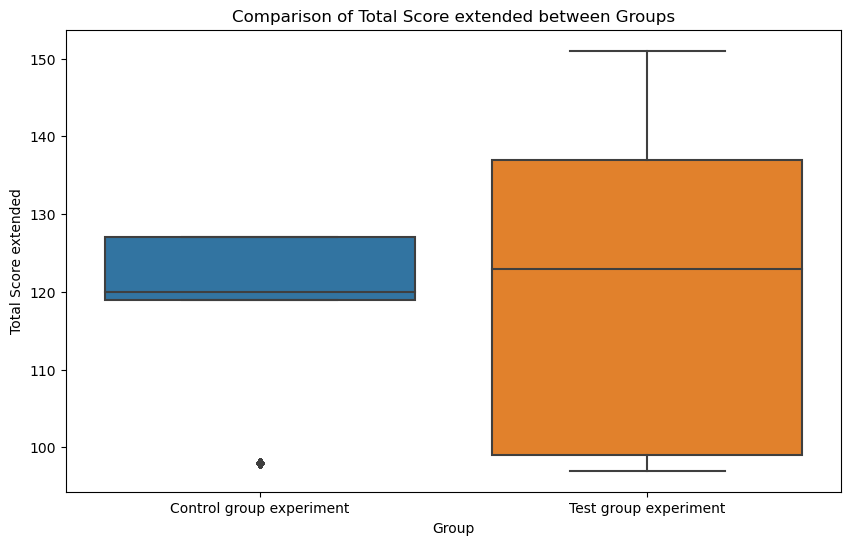

In [31]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Project name', y='Total Score extended', data=pd.concat([control_group_data, test_group_data]))
plt.xlabel('Group')
plt.ylabel('Total Score extended')
plt.title('Comparison of Total Score extended between Groups')
plt.savefig("boxplot_quest.jpg")
plt.show()

### EYE MOVEMENT TYPES

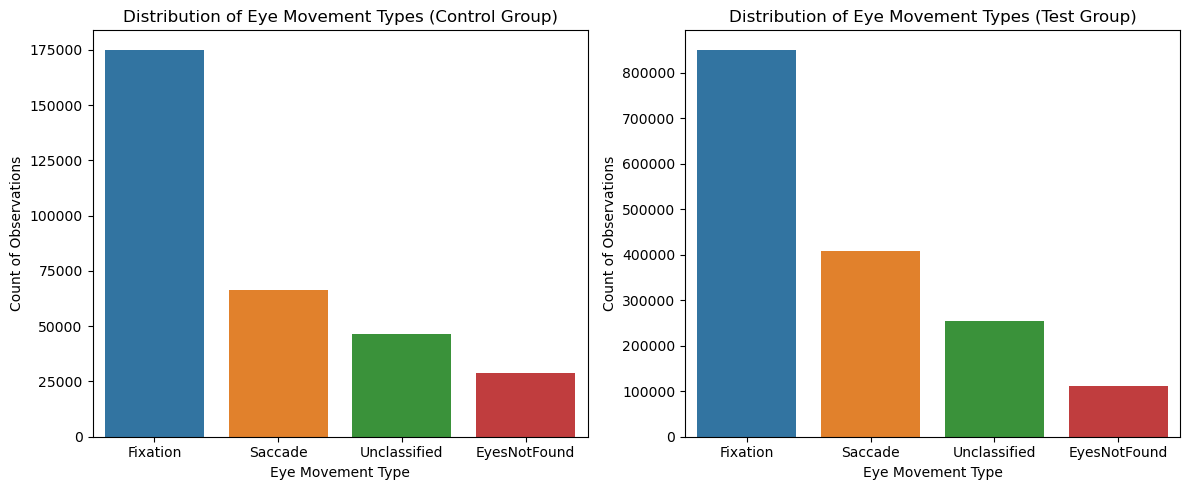

In [33]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
# Get the unique eye movement types to ensure consistent order across plots
eye_movement_types = df['Eye movement type'].dropna().unique()

# Create the subplots
plt.figure(figsize=(12, 5))

# Plot for the test group
plt.subplot(1, 2, 2)
sns.countplot(x='Eye movement type', data=test_group_data, order=eye_movement_types)
plt.title("Distribution of Eye Movement Types (Test Group)")
plt.xlabel("Eye Movement Type")
plt.ylabel("Count of Observations")

# Plot for the control group
plt.subplot(1, 2, 1)
sns.countplot(x='Eye movement type', data=control_group_data, order=eye_movement_types)
plt.title("Distribution of Eye Movement Types (Control Group)")
plt.xlabel("Eye Movement Type")
plt.ylabel("Count of Observations")

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("dist_eyemove.jpg")
plt.show()

In [34]:
print("test group", test_group_data['Eye movement type'].value_counts())
print("control group", control_group_data['Eye movement type'].value_counts())

test group Eye movement type
Fixation        851066
Saccade         409136
Unclassified    255508
EyesNotFound    112538
Name: count, dtype: int64
control group Eye movement type
Fixation        175062
Saccade          66490
Unclassified     46643
EyesNotFound     28705
Name: count, dtype: int64


In [35]:
# Calculate the total count for each group
total_test_group_count = test_group_data['Eye movement type'].count()
total_control_group_count = control_group_data['Eye movement type'].count()

# Calculate the percentage of each count for the test group
test_group_percentage = (test_group_data['Eye movement type'].value_counts() / total_test_group_count) * 100

# Calculate the percentage of each count for the control group
control_group_percentage = (control_group_data['Eye movement type'].value_counts() / total_control_group_count) * 100

# Round the percentages to two decimal places
test_group_percentage = test_group_percentage.round(2)
control_group_percentage = control_group_percentage.round(2)

# Print the percentages
print("Test Group Eye Movement Percentage:")
print(test_group_percentage)

print("\nControl Group Eye Movement Percentage:")
print(control_group_percentage)


Test Group Eye Movement Percentage:
Eye movement type
Fixation        52.27
Saccade         25.13
Unclassified    15.69
EyesNotFound     6.91
Name: count, dtype: float64

Control Group Eye Movement Percentage:
Eye movement type
Fixation        55.24
Saccade         20.98
Unclassified    14.72
EyesNotFound     9.06
Name: count, dtype: float64


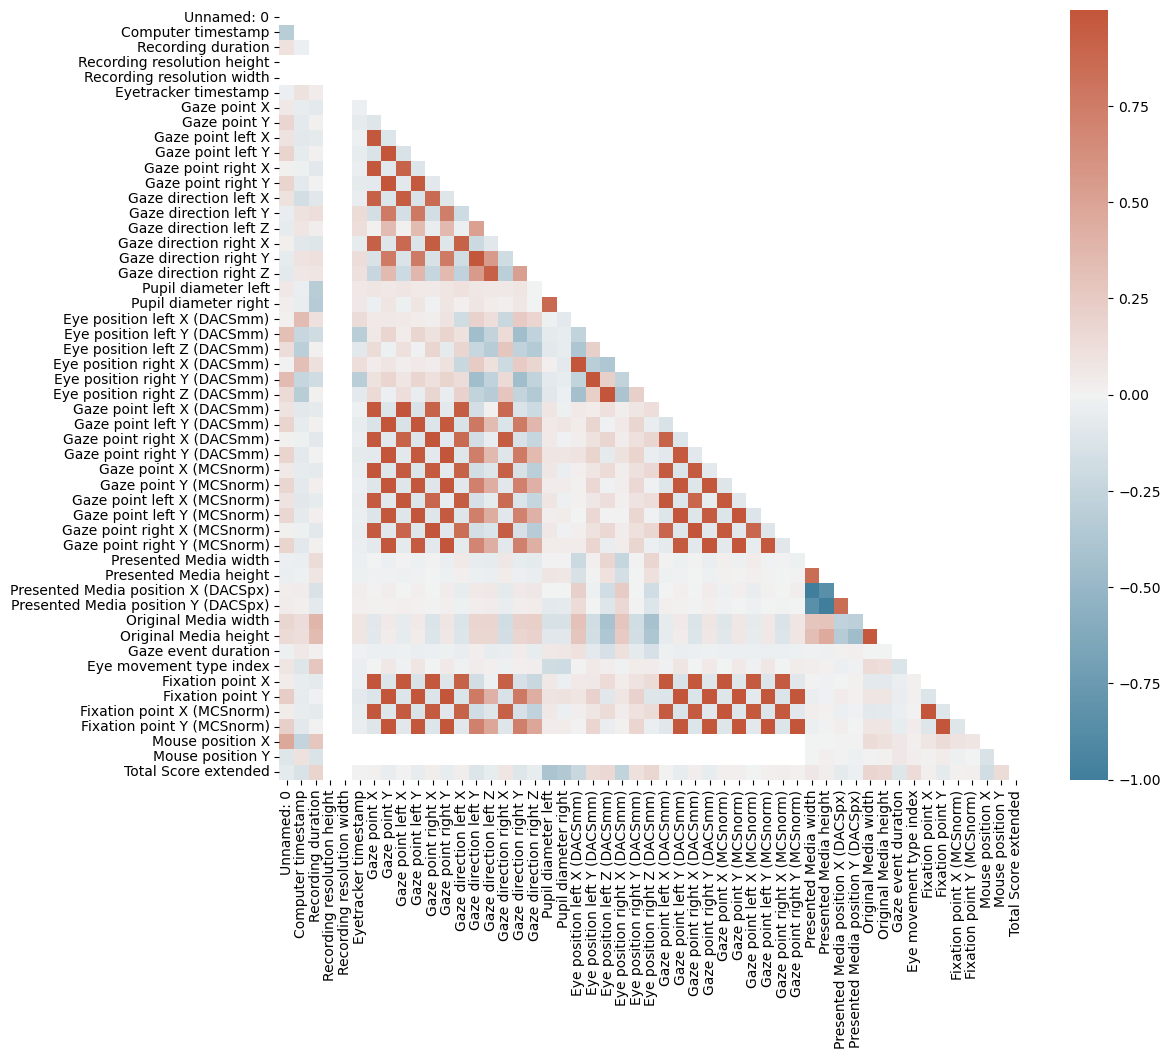

In [36]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
# Filter only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Compute correlation on numeric columns
corr_matrix = numeric_data.corr()

f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap=cmap)
plt.savefig("corr_all.jpg", bbox_inches='tight')
plt.show()

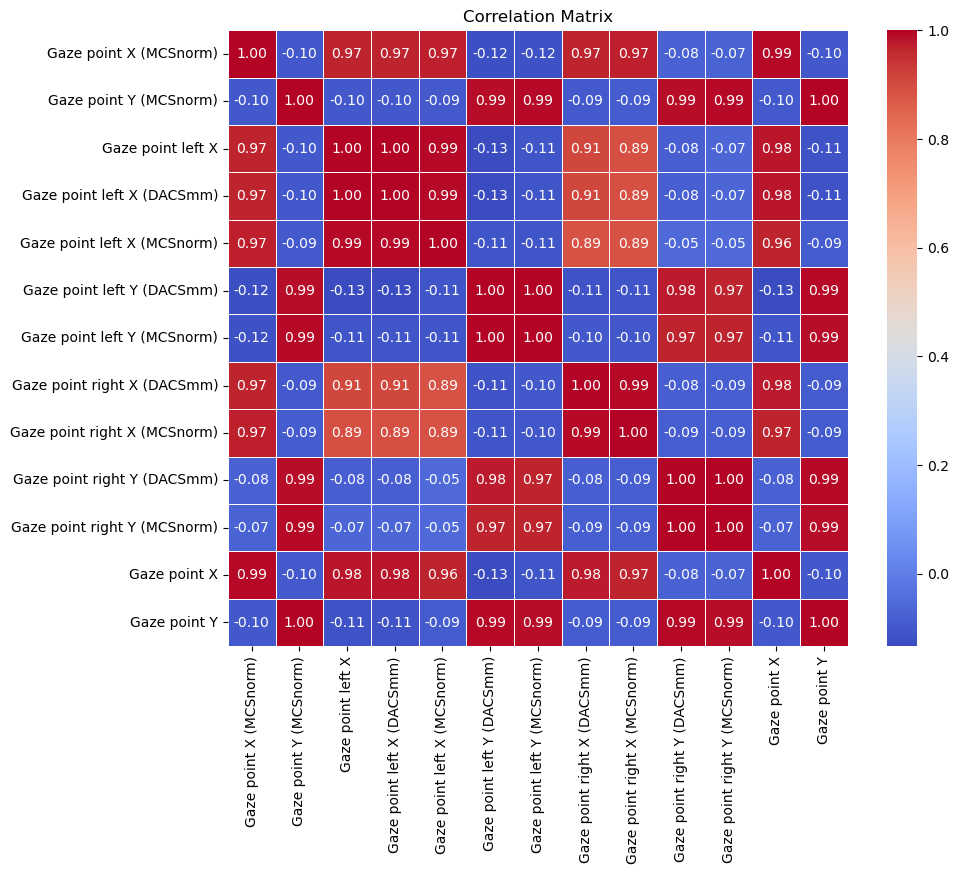

In [37]:
selected_columns = ['Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X', 'Gaze point left X (DACSmm)', 'Gaze point left X (MCSnorm)', 
                    'Gaze point left Y (DACSmm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (DACSmm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (DACSmm)', 
                    'Gaze point right Y (MCSnorm)', 'Gaze point X', 'Gaze point Y', ]  
correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


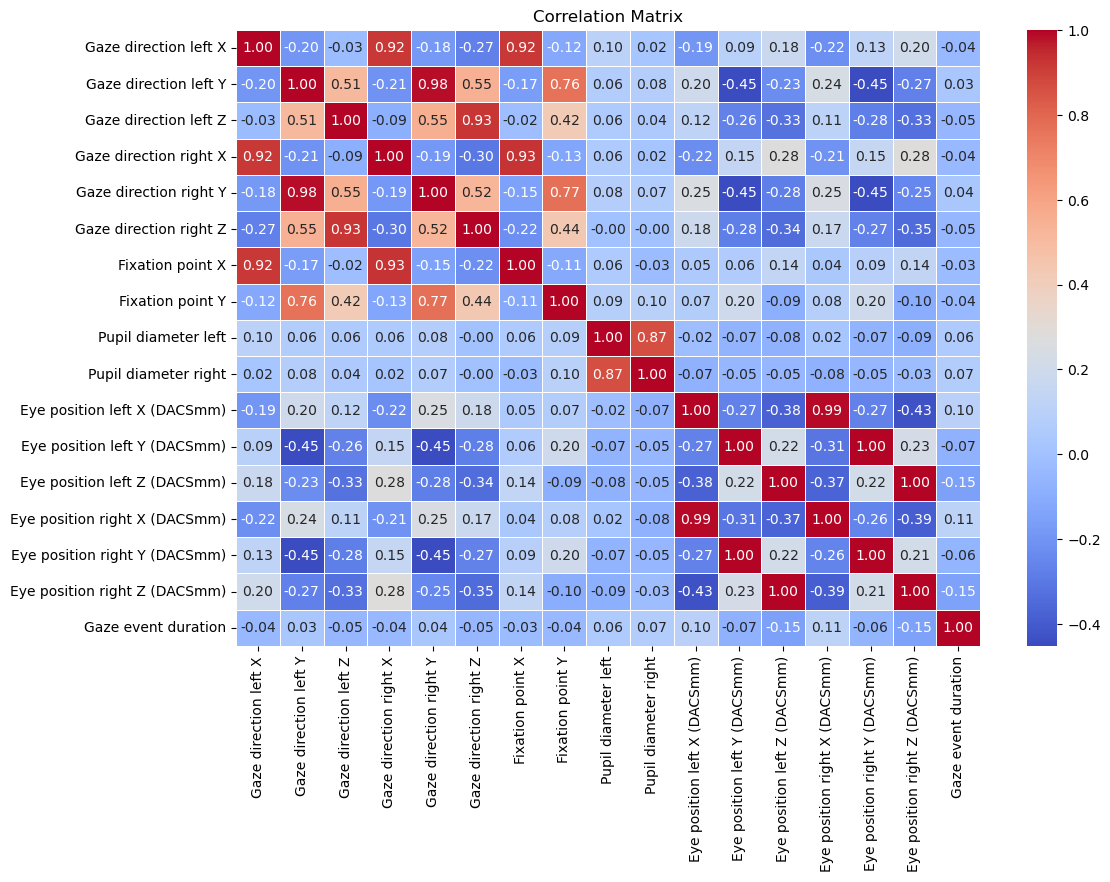

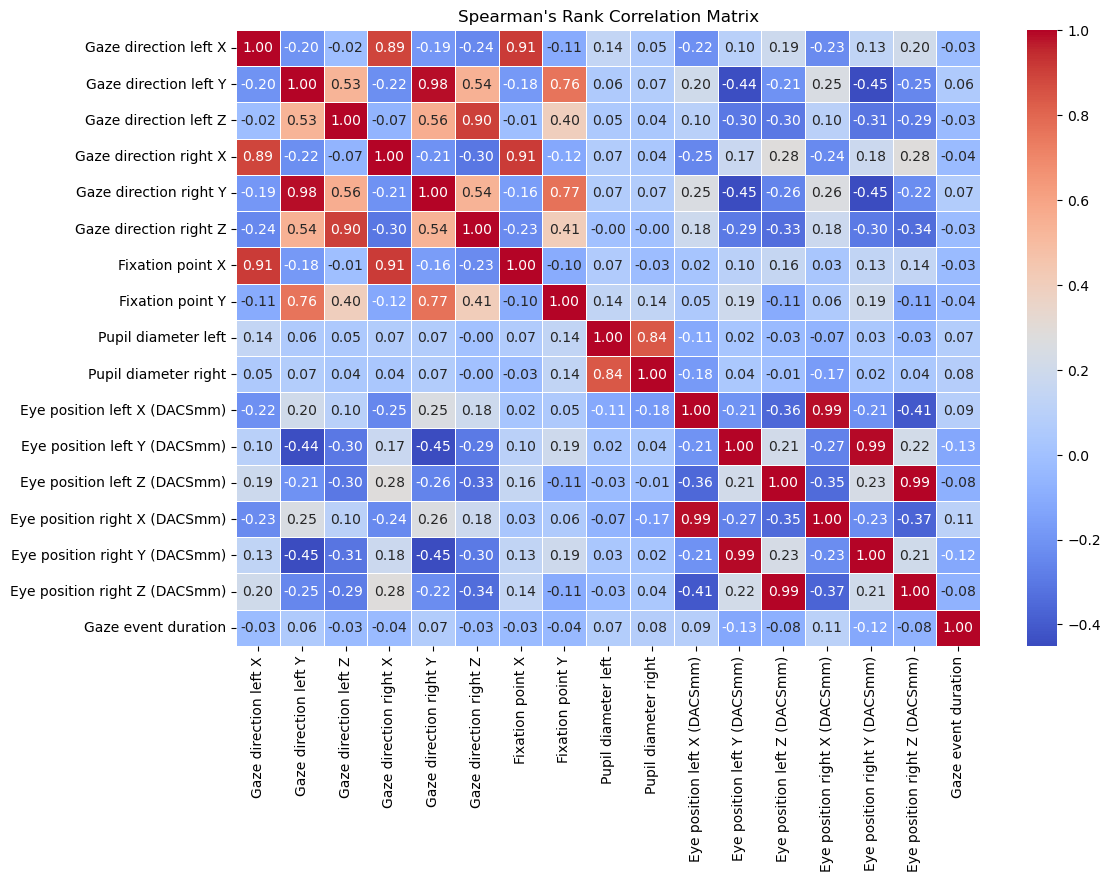

In [38]:

# List of other features to analyze correlation with gaze direction
other_features = ['Fixation point X', 'Fixation point Y', 
                  'Pupil diameter left', 'Pupil diameter right', 
                  'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)',
                  'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)',
                  'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
                  'Gaze event duration']

# Compute Pearson correlation coefficients
correlation_matrix = df[['Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z'] + other_features].corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Spearman's Rank Correlation
spearman_correlation_matrix = df[['Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z']+ other_features].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Spearman's Rank Correlation Matrix")
plt.show()



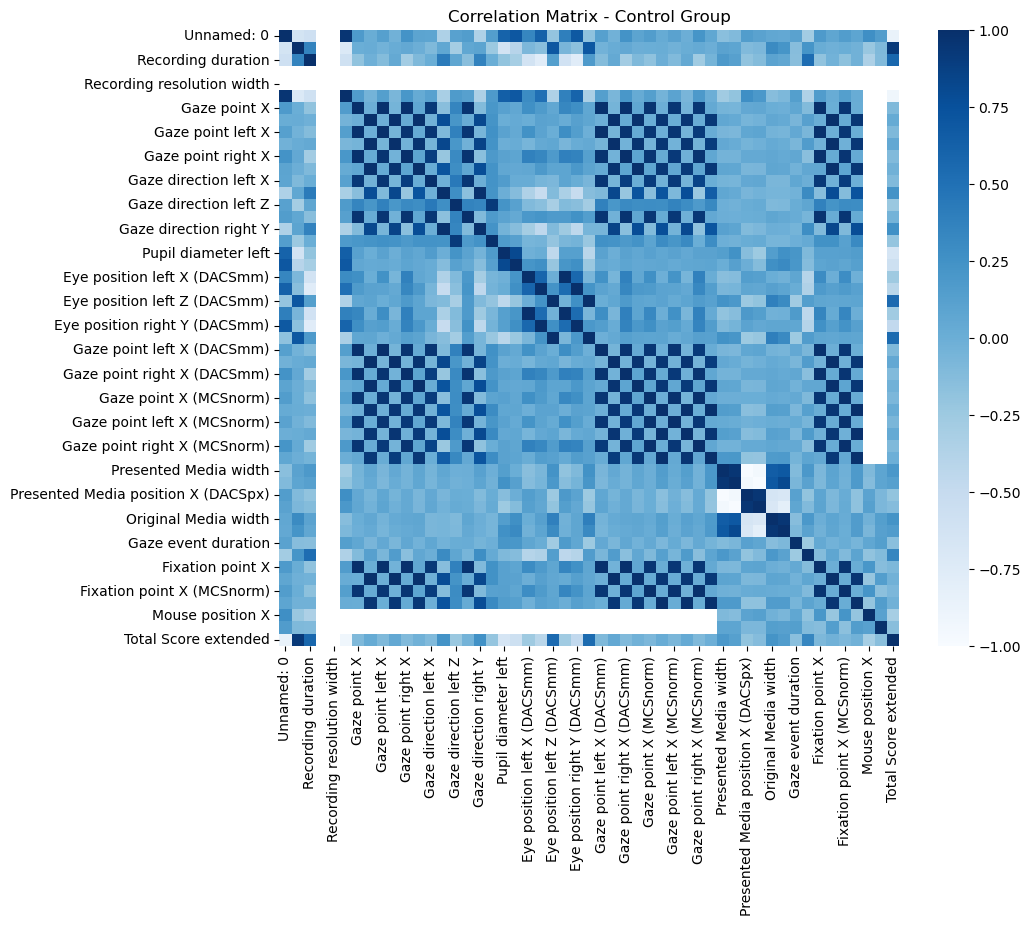

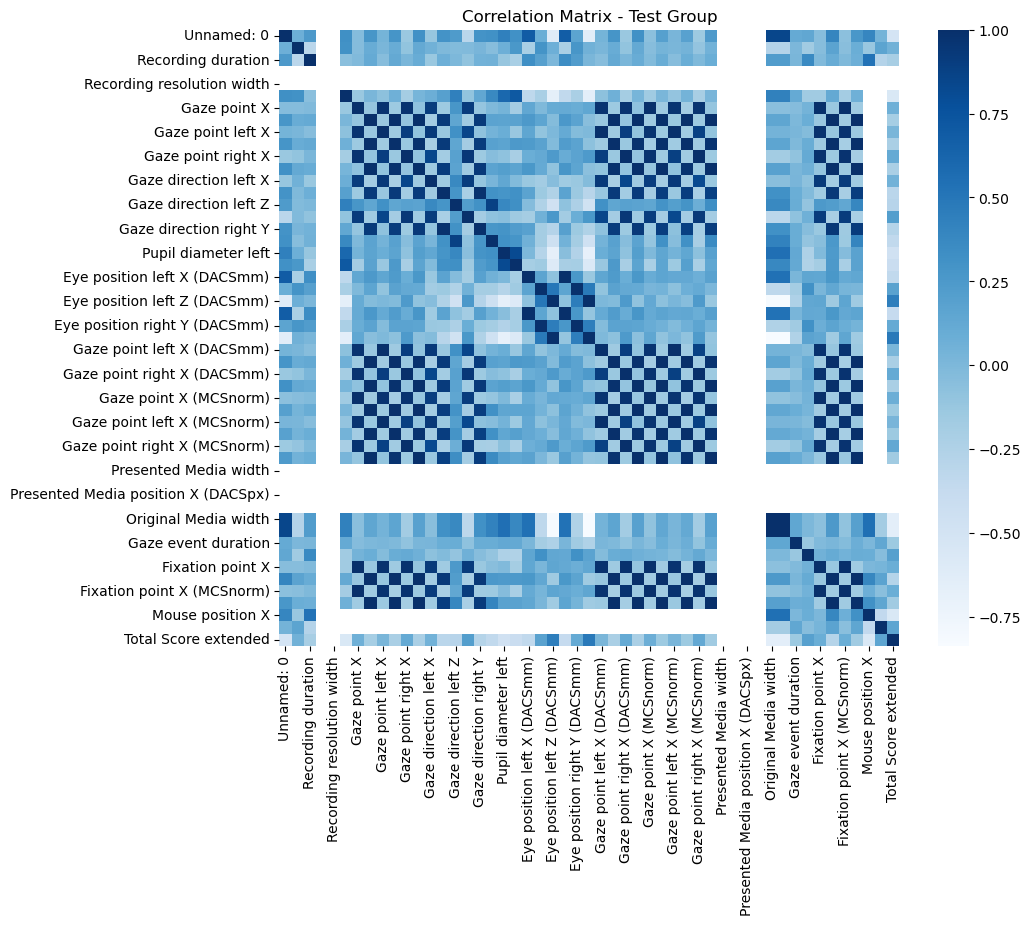

In [39]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
# Select only numeric columns for the correlation matrix in the control group
numeric_columns_control = control_group_data.select_dtypes(include=[np.number])
control_corr_matrix = numeric_columns_control.corr()

# Visualize the correlation matrix for the control group
plt.figure(figsize=(10, 8))
sns.heatmap(control_corr_matrix, cmap="Blues")
plt.title('Correlation Matrix - Control Group')
plt.savefig("corr-control.jpg", bbox_inches='tight')
plt.show()

# Select only numeric columns for the correlation matrix in the test group
numeric_columns_test = test_group_data.select_dtypes(include=[np.number])
test_corr_matrix = numeric_columns_test.corr()

# Visualize the correlation matrix for the test group
plt.figure(figsize=(10, 8))
sns.heatmap(test_corr_matrix, cmap="Blues")
plt.title('Correlation Matrix - Test Group')
plt.savefig("corr-test.jpg", bbox_inches='tight')
plt.show()

In [40]:
# Select relevant columns for control group
control_selected_columns = ['Participant name', 'Recording duration',
                             'Pupil diameter left', 'Pupil diameter right',
                             'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
                             'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
                             'Gaze event duration', 'Fixation point X', 'Fixation point Y', 'Total Score extended', 'Gaze point X', 'Gaze point Y', 'Gaze event duration']

# Create a DataFrame with selected columns for control group
control_group_selected = control_group_data[control_selected_columns]

# Select relevant columns for test group
test_selected_columns = ['Participant name', 'Recording duration',
                         'Pupil diameter left', 'Pupil diameter right',
                         'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
                         'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
                         'Gaze event duration', 'Fixation point X', 'Fixation point Y', 'Total Score extended', 'Gaze point X', 'Gaze point Y', 'Gaze event duration']

# Create a DataFrame with selected columns for test group
test_group_selected = test_group_data[test_selected_columns]

In [41]:
print("Number of Missing Values Percentages:")
nan_percentage = control_group_selected.isna().sum() / len(control_group_selected) * 100
print(nan_percentage)

nan_percentage = test_group_selected.isna().sum() / len(test_group_selected) * 100
print(nan_percentage)

Number of Missing Values Percentages:
Participant name                  0.000000
Recording duration                0.000000
Pupil diameter left              71.574929
Pupil diameter right             75.837632
Eye position left X (DACSmm)     15.224257
Eye position left Y (DACSmm)     15.224257
Eye position left Z (DACSmm)     15.224257
Eye position right X (DACSmm)    25.790777
Eye position right Y (DACSmm)    25.790777
Eye position right Z (DACSmm)    25.790777
Gaze event duration               0.011043
Fixation point X                 44.764068
Fixation point Y                 44.764068
Total Score extended              0.000000
Gaze point X                     10.994052
Gaze point Y                     10.994052
Gaze event duration               0.011043
dtype: float64
Participant name                  0.000000
Recording duration                0.000000
Pupil diameter left              73.235838
Pupil diameter right             72.748260
Eye position left X (DACSmm)     13.754656
E

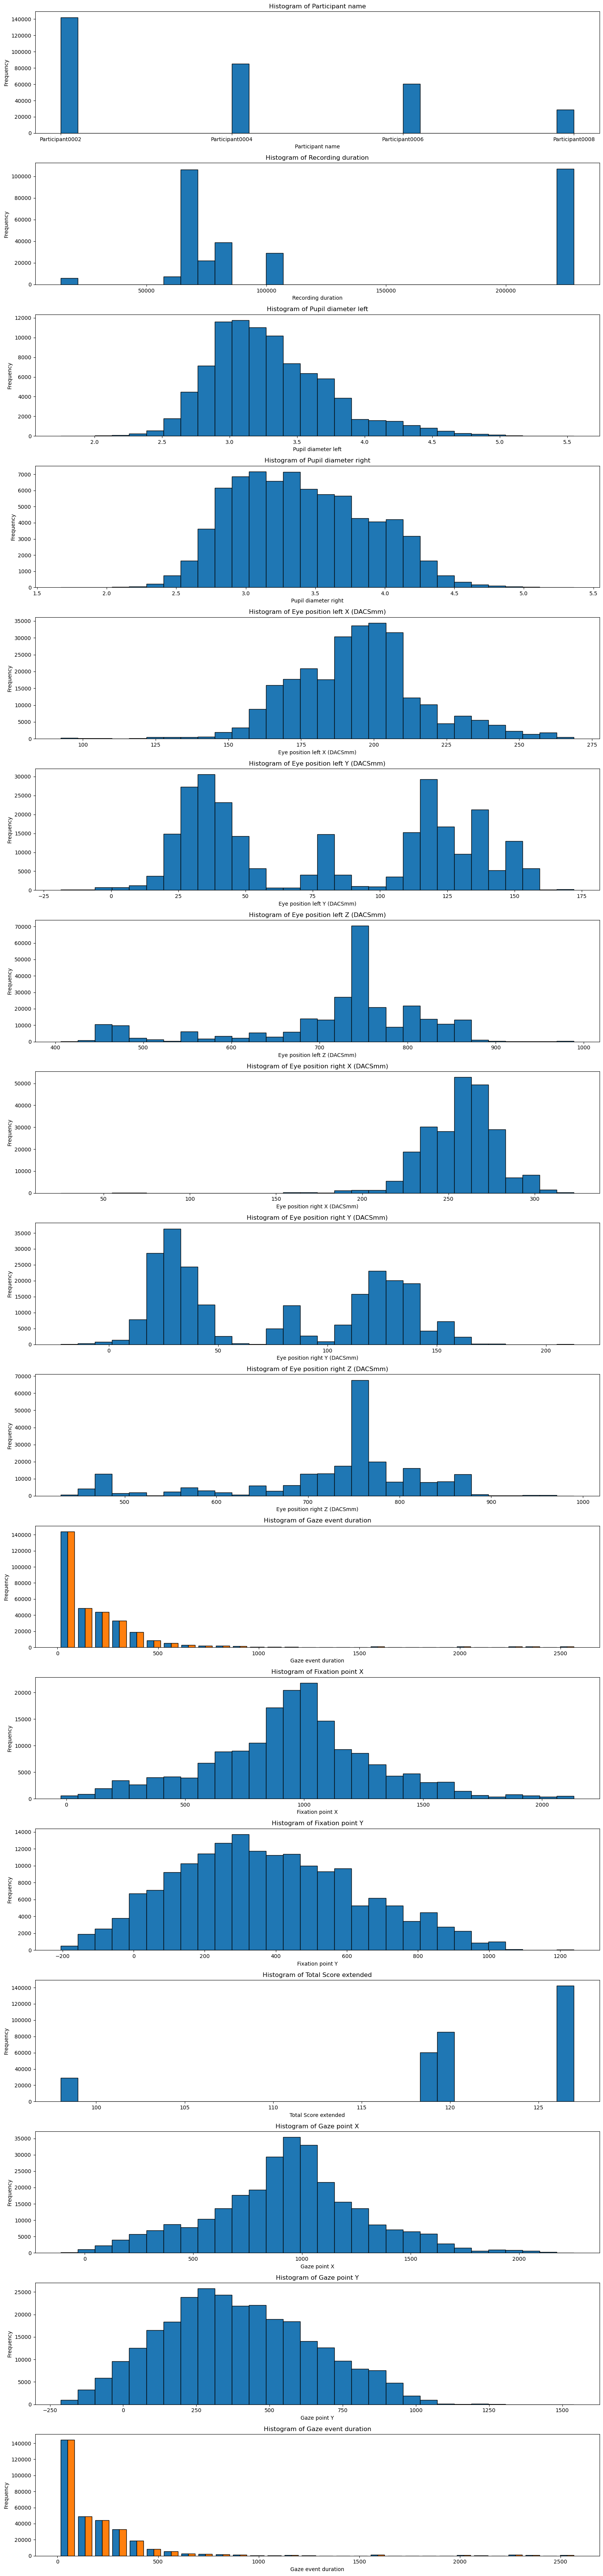

In [42]:
def plot_histograms(df):
    num_columns = len(df.columns)
    plt.figure(figsize=(16, num_columns * 4))  
    
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_columns, 1, i)
        plt.hist(df[column].dropna(), bins=30, edgecolor='k')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_histograms(control_group_selected)

In [ ]:
correlation = control_group_selected.corr()['Total Score extended']

print("Correlation between Target variable and Feature variables:")
print(correlation)

# references


In [ ]:
Raval, P. (2024). Eyetempathyscore.ipynb. Retrieved 11/01/2024,
from http://web.archive.org/web/20080207010024/http://
www.808multimedia.com/winnt/kernel.htm